In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:10<00:00, 109MB/s]
100% 812M/812M [00:11<00:00, 77.2MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.12330.jpg', 'cat.2975.jpg', 'cat.3738.jpg', 'dog.8085.jpg', 'dog.6857.jpg', 'cat.2415.jpg', 'dog.7285.jpg', 'dog.10791.jpg', 'dog.8113.jpg', 'dog.2501.jpg', 'cat.9710.jpg', 'cat.6168.jpg', 'cat.99.jpg', 'cat.12372.jpg', 'cat.8639.jpg', 'cat.7930.jpg', 'dog.1935.jpg', 'cat.2541.jpg', 'dog.4183.jpg', 'dog.850.jpg', 'dog.3346.jpg', 'cat.1196.jpg', 'cat.10839.jpg', 'cat.8485.jpg', 'dog.8052.jpg', 'dog.1009.jpg', 'cat.7079.jpg', 'cat.5783.jpg', 'dog.2174.jpg', 'dog.4164.jpg', 'cat.1251.jpg', 'dog.10248.jpg', 'cat.2974.jpg', 'dog.11076.jpg', 'cat.3578.jpg', 'cat.9631.jpg', 'dog.7927.jpg', 'dog.1285.jpg', 'cat.12358.jpg', 'dog.1340.jpg', 'dog.47.jpg', 'cat.1788.jpg', 'dog.11548.jpg', 'dog.853.jpg', 'dog.5968.jpg', 'dog.3806.jpg', 'cat.235.jpg', 'cat.10578.jpg', 'dog.8185.jpg', 'dog.8258.jpg', 'dog.3875.jpg', 'dog.4009.jpg', 'cat.3382.jpg', 'dog.2560.jpg', 'dog.9080.jpg', 'dog.6403.jpg', 'cat.7233.jpg', 'dog.6366.jpg', 'cat.1277.jpg', 'cat.2420.jpg', 'cat.2212.jpg', 'cat.1421.jpg', 'cat.

Importing dependencies


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

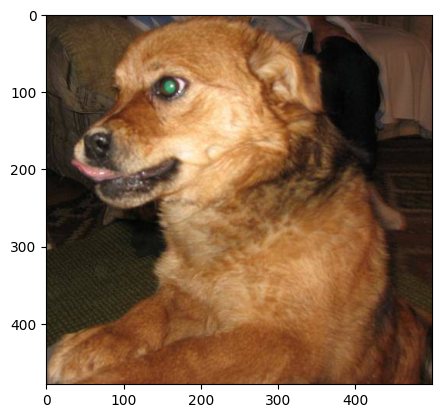

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.1009.jpg')
imgplt = plt.imshow(img)
plt.show()

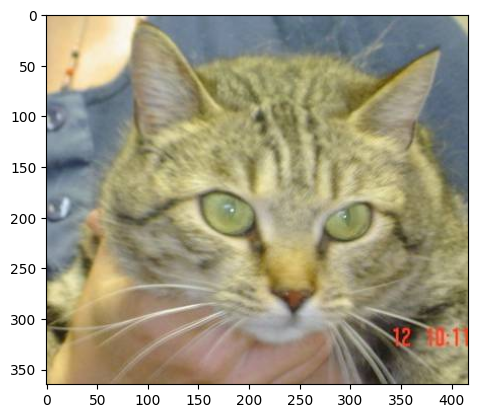

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.7544.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
cat
cat
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [ ]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

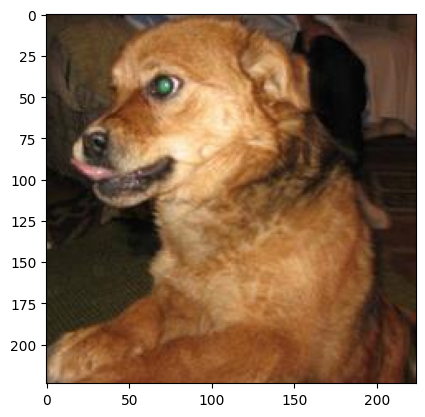

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.1009.jpg')
imgplt = plt.imshow(img)
plt.show()

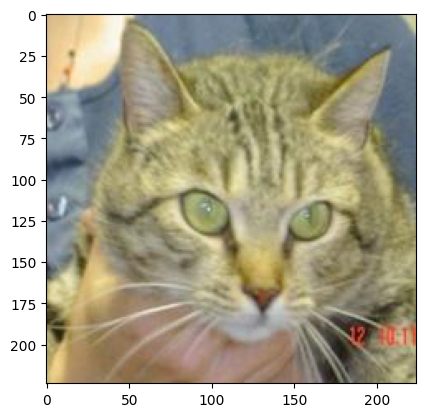

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.7544.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.12330.jpg', 'cat.2975.jpg', 'cat.3738.jpg', 'dog.8085.jpg', 'dog.6857.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 980 1020]


Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 16  30  36]
   [ 13  27  33]
   [  9  23  29]
   ...
   [  8  18  25]
   [ 11  19  26]
   [  8  16  23]]

  [[ 15  29  35]
   [ 12  26  32]
   [  8  22  28]
   ...
   [ 11  21  28]
   [ 12  20  27]
   [  6  14  21]]

  [[ 13  27  33]
   [ 10  24  30]
   [  7  21  27]
   ...
   [ 16  24  31]
   [ 14  20  27]
   [  7  13  20]]

  ...

  [[112 105 108]
   [114 106 107]
   [116 105 107]
   ...
   [ 66 114 132]
   [ 79 116 138]
   [ 88 120 143]]

  [[110 103 108]
   [112 103 106]
   [114 103 106]
   ...
   [ 76 122 140]
   [ 82 117 137]
   [ 92 123 144]]

  [[109 102 107]
   [109 102 107]
   [113 102 105]
   ...
   [ 75 121 139]
   [ 81 116 136]
   [ 96 125 146]]]


 [[[165 180 153]
   [162 177 150]
   [159 174 147]
   ...
   [172 179 146]
   [167 174 141]
   [163 170 137]]

  [[155 170 143]
   [152 167 140]
   [150 165 138]
   ...
   [163 169 138]
   [157 163 132]
   [152 158 127]]

  [[153 168 141]
   [150 165 138]
   [148 163 136]
   ...
   [161 165 136]
   [152 156 127]
   [145 149

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.62745098 0.5254902  0.64313725]
   [0.64313725 0.54117647 0.65882353]
   [0.65490196 0.55294118 0.67058824]
   ...
   [0.10980392 0.1254902  0.2627451 ]
   [0.10980392 0.11764706 0.25490196]
   [0.09803922 0.10588235 0.24313725]]

  [[0.62352941 0.52156863 0.63921569]
   [0.63529412 0.53333333 0.65098039]
   [0.64705882 0.54509804 0.6627451 ]
   ...
   [0.09803922 0.11372549 0.25098039]
   [0.08627451 0.09411765 0.23137255]
   [0.07058824 0.07843137 0.21176471]]

  [[0.63529412 0.53333333 0.65098039]
   [0.63921569 0.5372549  0.65490196]
   [0.64313725 0.54117647 0.65882353]
   ...
   [0.05882353 0.07843137 0.20784314]
   [0.03921569 0.05882353 0.18823529]
   [0.02745098 0.04705882 0.16862745]]

  ...

  [[0.43137255 0.34509804 0.45490196]
   [0.43137255 0.34509804 0.45490196]
   [0.42352941 0.34901961 0.44705882]
   ...
   [0.19607843 0.21176471 0.28235294]
   [0.20392157 0.21176471 0.28235294]
   [0.20784314 0.21568627 0.28627451]]

  [[0.41960784 0.33333333 0.44313725]
   [0.4

Building the Neural Network

In [ ]:
!pip install tf_keras
import tf_keras

In [ ]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 81s 2s/step - loss: 0.1849 - acc: 0.9375
Epoch 2/5
50/50 [==============================] - 71s 1s/step - loss: 0.0690 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 59s 1s/step - loss: 0.0510 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 58s 1s/step - loss: 0.0421 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0312 - acc: 0.9919


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0433 - acc: 0.9850
Test Loss = 0.043318577110767365
Test Accuracy = 0.9850000143051147


Predictive System

Path of the image to be predicted: /content/dog.jpeg


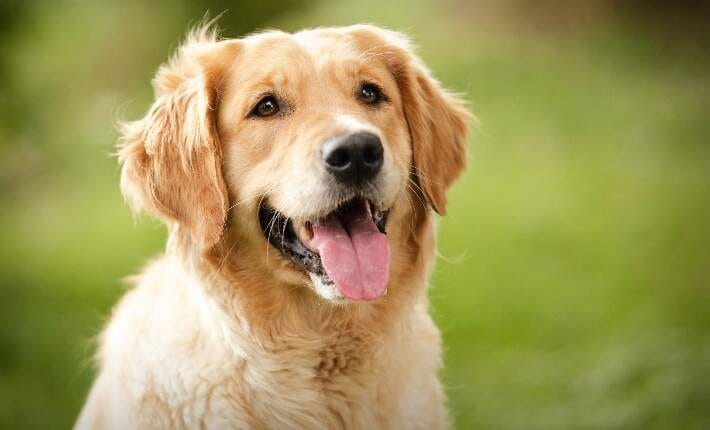

1/1 [==============================] - 1s 751ms/step
[[-3.0222428  2.163613 ]]
1
The image represents a Dog


In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpeg


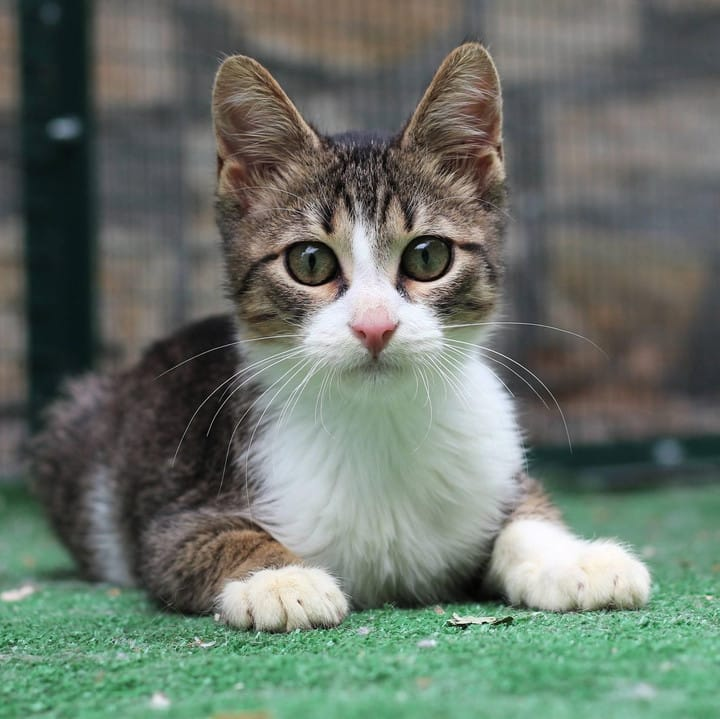

1/1 [==============================] - 0s 92ms/step
[[ 3.5537755 -4.4007654]]
0
The image represents a Cat


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')